In [2]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt
import detect

In [60]:
def blur(img, x,y,w,h, k=211):
    startY = y
    endY = y+h
    startX = x
    endX = x+w
    img[startY:endY, startX:endX] = cv2.blur(img[startY:endY, startX:endX], 
                                             (k, k))
    return img

def pixelate(img, x,y,w,h, scale=16):
    startY = y
    endY = y+h
    startX = x
    endX = x+w
    # Resize input to "pixelated" size
    temp = cv2.resize(img[startY:endY, startX:endX], (scale,scale),
                      interpolation=cv2.INTER_LINEAR)
    # Initialize output image
    img[startY:endY, startX:endX] = cv2.resize(temp, (h, w), interpolation=cv2.INTER_NEAREST)
    return img

def mask(img, x,y,w,h):
    startY = y
    endY = y+h
    startX = x
    endX = x+w
    img[startY:endY, startX:endX] = 0
    return img

def noise(img, x , y, w,h, threshold = 0.6):
    startY = y
    endY = y+h
    startX = x
    endX = x+w
    random_map = np.random.random((h,w, 1)).astype(np.float16)
    random_mask = np.random.randint(low=0, high=255, size=(h,w,3))
    temp = np.asarray( img[startY:endY, startX:endX], dtype="int32" )
    temp = np.where(random_map < threshold, temp, random_mask)
    img[startY:endY, startX:endX] = temp
    return img


cascPath = "haarcascade_frontalface_default.xml"
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=10,
                                        minSize=(40, 40)
                                       )
    

In [56]:
# Get user supplied values
imagePath = 'my.jpg'
cascPath = "haarcascade_frontalface_default.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
image = cv2.imread(imagePath)
faces = detect_face(image)

print("Found {0} faces!".format(len(faces)))

Found 1 faces!


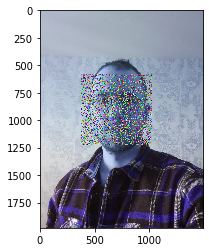

In [61]:
for (x,y,w,h) in faces:
    #image_d = blur(image,x,y,w,h)
    #image_d = pixelate(image,x,y,w,h, scale=10)
    #image_d = mask(image,x,y,w,h)
    image_d = noise(image,x,y,w,h)
    
plt.imshow(image_d)

In [48]:
np.asarray( image, dtype="int32" )

array([[[175, 182, 199],
        [175, 182, 199],
        [175, 182, 199],
        ...,
        [132, 139, 158],
        [132, 139, 158],
        [132, 139, 158]],

       [[175, 182, 199],
        [175, 182, 199],
        [175, 182, 199],
        ...,
        [132, 139, 158],
        [132, 139, 158],
        [132, 139, 158]],

       [[175, 182, 199],
        [175, 182, 199],
        [175, 182, 199],
        ...,
        [134, 141, 160],
        [134, 141, 160],
        [134, 141, 160]],

       ...,

       [[174, 165, 161],
        [173, 164, 160],
        [173, 164, 160],
        ...,
        [ 37,  31,  32],
        [ 37,  31,  32],
        [ 37,  31,  32]],

       [[174, 165, 161],
        [173, 164, 160],
        [173, 164, 160],
        ...,
        [ 37,  31,  32],
        [ 37,  31,  32],
        [ 37,  31,  32]],

       [[174, 165, 161],
        [173, 164, 160],
        [173, 164, 160],
        ...,
        [ 37,  31,  32],
        [ 37,  31,  32],
        [ 37,  31,  32]]